<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Николай! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='purple'><b>Комментарий студента: Привет! поехали :) </b></font>

## Проект спринт 12
**Название проекта**:  
Цифра     
_____
**Описание исследования**:  
Построение модели предсказания коэффициента восстановления золота из золотосодержащей руды на основании данных с параметрами добычи и очистки.  
_____
**Цель исследования**:  
Оптимизация производства, чтобы не запускать предприятие с убыточными характеристиками.
_____
**План исследования.**  
[Шаг 1. Загрузка и подготовка данных](#step1)  
[Шаг 2. Анализ данных](#step2)  
[Шаг 3. Построение модели](#step3)  
[Шаг 4. Результаты и выводы](#step4)  
_____
**Исходные данные.**
Исходные файлы, содержащие данные геологоразведки трёх регионов:  
- [gold_recovery_full_new.csv](gold_recovery_full_new.csv) - полные исходные данные
- [gold_recovery_test_new.csv](gold_recovery_test_new.csv) - валидационная выборка
- [gold_recovery_train_new.csv](gold_recovery_train_new.csv) - обучающая выборка   


<a id='step1'></a>
## Шаг 1. Загрузка и подготовка данных

In [54]:
# загружаем нужные библиотеки
import pandas as pd
import numpy as np

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error as mae

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import seaborn as sns

from matplotlib import pyplot as plt

RANDOM_STATE = 54321
CROSS_VALS = 3

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>  
<font color='purple'><b>Комментарий студента: немного причесал</b></font>

### Откроем файлы и изучим их

In [55]:
def load_file(file_name):
    try:
        df = pd.read_csv(file_name)
        print('Загрузили файл локально')
    except:
        file_path = 'https://code.s3.yandex.net/datasets/' + file_name
        print('локально не удалось, загружаем из интернета')
        df = pd.read_csv(file_path)
    return df

In [56]:
full = load_file('gold_recovery_full_new.csv')
test = load_file('gold_recovery_test_new.csv')
train = load_file('gold_recovery_train_new.csv')
print(full.shape)
print(train.shape)
print(test.shape)

Загрузили файл локально
Загрузили файл локально
Загрузили файл локально
(19439, 87)
(14149, 87)
(5290, 53)


в тестовом датасете меньше фичей, чем в полной и обучающих выборках

In [57]:
display(train.sample(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5200,2017-01-29 08:59:59,5.217989,11.238640,15.238428,43.749006,68.922440,12.922286,5.437724,8.985606,4.546016,...,21.039091,-503.117994,20.970665,-501.149993,23.015815,-500.239163,19.994926,-499.854315,25.000414,-600.304728
6030,2017-03-07 07:59:59,6.370598,9.618098,9.030706,44.870636,68.346857,10.027193,2.878877,7.771548,3.216991,...,24.984493,-399.034703,23.018648,-399.757025,23.891130,-449.504515,19.978392,-449.711501,24.982573,-499.578453


In [58]:
print(train.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Проверим, что эффективность обогащения рассчитана правильно

In [59]:
# C (F - T)
# F (C - T)
# C - Au after
# F - Au before
# T - Au in tails
train['rougher.output.recovery_calc'] =\
        100.0 * train['rougher.output.concentrate_au'] * \
        (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])\
        / (train['rougher.input.feed_au'] *\
        (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))
m = mae(train['rougher.output.recovery'], train['rougher.output.recovery_calc'])
print(m)

1.1498046842860452e-14


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Старайся разбивать код на строчки так, что бы всё было перед глазами. По стандарту строка кода не должна превышать 79 символов.</font>  
<font color='purple'><b>Комментарий студента: привел к PEP8</b></font>

на ~~тестовой~~обучающей выборке разница MAE между рассчитанным уровнем обогащения и из данных ничтожно мал, можно рассчитывать на исходные данные

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Это обучающая выборка.</font>  
<font color='purple'><b>Комментарий студента: поправлено</b></font>

### Проанализируем признаки, недоступные в тестовой выборке

In [60]:
test_columns = set(test.columns)
train_columns = set(train.columns)
diff = list(sorted(train_columns - test_columns))
diff

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

In [61]:
display(train[diff].info())
display(train[diff].sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,...,rougher.output.recovery,rougher.output.recovery_calc,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
3034,5.404337,42.416962,10.789302,8.474195,73.056459,6.635776,2.131834,1.164137,11.565514,8.389417,...,81.172722,81.172722,5.470795,1.912540,0.706504,17.353602,9.267893,3.120185,2.646718,10.334443
9606,3.201864,47.222238,11.256062,8.874001,49.115669,6.396199,3.511858,3.352285,13.830313,6.955909,...,80.143920,80.143920,4.470854,1.761980,0.711415,20.015304,16.627834,3.710315,7.852582,3.863150
6681,4.947462,44.836895,11.070097,12.344798,65.807090,8.437329,2.773103,3.194431,11.942927,7.915612,...,82.354748,82.354748,6.615103,1.761836,0.665507,17.855964,11.483023,4.601166,4.725640,7.340814
10790,6.490724,42.810933,9.782499,10.877091,72.374853,15.040089,4.034848,4.268424,10.273596,10.773678,...,90.774261,90.774261,6.888619,2.231302,0.731141,14.580602,18.294621,6.084997,9.229720,6.108796
314,6.318220,42.193008,10.954278,7.720092,74.037297,10.942622,2.478461,0.995687,13.769611,10.288488,...,85.234175,85.234175,5.497483,1.922809,0.545655,18.788012,12.879177,3.205985,3.594423,12.579776
3840,7.915743,42.211576,7.703512,14.607461,74.829457,11.069358,2.703334,2.044934,11.503728,10.766346,...,86.674429,86.674429,6.533600,1.950495,0.434541,19.777179,13.186135,4.478590,2.543778,9.541786
7306,5.348528,43.683794,11.345102,9.290074,65.151723,8.973639,3.119082,3.508830,9.265160,7.856789,...,80.023644,80.023644,6.450574,2.219919,0.611228,15.971703,12.719804,4.645326,5.504384,6.212157
9022,4.033203,48.102705,9.084460,6.746057,38.973980,7.079711,4.545851,3.144190,10.901802,4.524401,...,86.055762,86.055762,4.591009,1.309259,0.587168,18.195025,15.457715,11.800360,8.418786,6.938265
634,8.873265,32.612995,10.458720,6.999569,76.160256,10.207808,1.683245,0.727325,19.284589,12.082327,...,82.944235,82.944235,5.591977,1.533779,0.669736,22.745998,8.727963,1.434826,1.981100,12.622136
5790,6.637628,42.446694,10.972776,16.943639,76.329365,12.709045,3.558991,4.317714,9.307951,9.461187,...,93.652180,93.652180,6.402378,1.588355,0.453621,16.145165,16.863426,1.827975,4.623123,12.347709


в тестовой выборке отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть)  
также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

### проведем предобработку данных

In [62]:
# уберем из train поля, которых нет в test (кроме целевых переменных)
target_columns = ['rougher.output.recovery', 'final.output.recovery']
target_date_columns = ['rougher.output.recovery', 'final.output.recovery', 'date']
diff = set(diff)
diff = list(diff - set(target_columns))

train.drop(diff, axis='columns', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Данные для моделей можно подготовить позже, у нас впереди ещё анализ данных.</font>

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   final.output.recovery                       14149 non-null  float64
 2   primary_cleaner.input.sulfate               14129 non-null  float64
 3   primary_cleaner.input.depressant            14117 non-null  float64
 4   primary_cleaner.input.feed_size             14149 non-null  float64
 5   primary_cleaner.input.xanthate              14049 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 10  primary_cl

In [64]:
train.sample(10)

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
11762,2018-04-22 06:59:59,71.494084,126.440984,8.013430,7.590000,1.288144,1702.605629,-499.848515,1701.571945,-500.375761,...,27.005400,-499.318233,20.024244,-499.954019,20.008185,-500.825747,15.003750,-500.011831,17.993746,-499.988766
8460,2017-07-05 04:59:59,64.317684,137.343417,5.902281,7.180000,0.791881,1699.305913,-499.932021,1698.321248,-499.894167,...,22.000562,-499.838397,14.889898,-380.420363,17.996905,-499.890930,12.993819,-500.154782,14.987352,-499.490853
5570,2017-02-14 16:59:59,75.181560,193.704513,11.971325,7.250000,0.685552,1697.864605,-499.877286,1698.656224,-500.046757,...,24.986105,-399.759213,23.020392,-400.373590,22.956199,-449.190472,20.004141,-450.060519,25.031209,-500.106993
10661,2018-02-28 02:59:59,79.143730,158.395507,10.914066,7.000000,1.520965,1699.116489,-500.226577,1700.214206,-500.211459,...,20.003542,-496.526432,15.051571,-499.864542,15.030158,-499.555770,12.027893,-499.958520,11.996906,-499.391212
6621,2017-04-05 02:59:59,65.689992,120.331862,6.491557,6.820000,0.395740,1737.028097,-500.167021,1750.864152,-499.988445,...,25.038089,-400.451678,23.081197,-400.832357,26.892075,-449.957105,24.023778,-450.309842,30.008402,-499.882475
12454,2018-05-25 06:59:59,44.948866,43.009291,6.986324,5.900000,0.687057,1601.164691,-499.707814,1599.791334,-499.113615,...,30.019064,-499.068778,19.909058,-499.223671,17.988994,-499.631861,14.022227,-499.479968,14.004110,-499.579076
4668,2016-08-31 10:59:59,73.162099,187.196170,15.004258,7.971333,0.996469,1400.561438,-500.017273,1402.611387,-499.932917,...,11.999250,-499.744159,8.080569,-499.415879,8.020908,-500.736820,5.019353,-499.894128,29.980955,-499.609610
7028,2017-04-22 17:59:59,61.049488,138.703094,4.983655,7.540000,0.400450,1788.458044,-500.353310,1752.257045,-499.666695,...,25.021523,-400.959877,23.004993,-402.054030,25.996751,-450.295063,24.019971,-450.026823,30.007069,-499.816407
9053,2017-07-31 17:59:59,64.551291,113.732715,5.454401,7.570000,0.398545,1399.810503,-499.599388,1397.638133,-499.738864,...,12.968254,-500.411911,9.944979,-400.332733,10.896986,-500.530715,9.002242,-500.078993,12.005765,-499.360940
4429,2016-08-20 18:59:59,70.144755,193.703379,12.961125,7.950000,1.058786,1702.224337,-500.338688,1699.344867,-499.451748,...,18.058543,-400.434894,9.968162,-400.088805,10.019100,-401.366443,5.022874,-400.596481,24.958419,-499.865433


In [65]:
train['date'] = pd.to_datetime(train.date, format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test.date, format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full.date, format='%Y-%m-%d %H:%M:%S')

In [66]:
train.dropna(inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Теряем данные.\
В условиях есть указание, что соседние данные похожи. Можно протестировать работу моделей с заполнением по этому условию.</font>

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12679 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        12679 non-null  datetime64[ns]
 1   final.output.recovery                       12679 non-null  float64       
 2   primary_cleaner.input.sulfate               12679 non-null  float64       
 3   primary_cleaner.input.depressant            12679 non-null  float64       
 4   primary_cleaner.input.feed_size             12679 non-null  float64       
 5   primary_cleaner.input.xanthate              12679 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      12679 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    12679 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      12679 non-null  float64       
 9   primar

### построим распределения переменных в обучающих и тестовых выборках на одних графиках

date


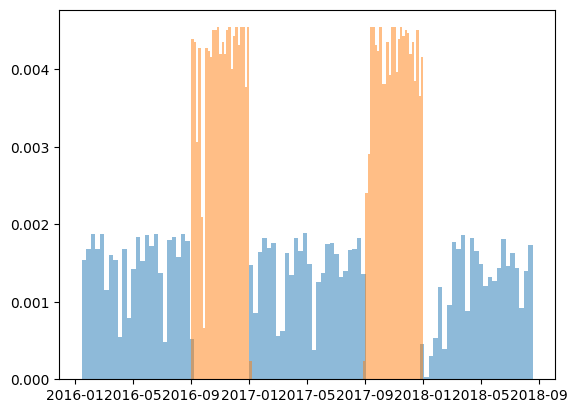

final.output.recovery


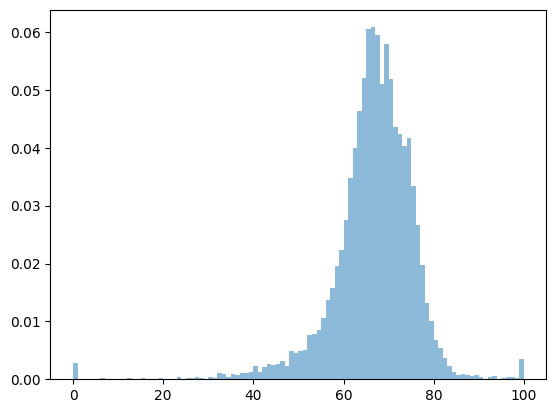

primary_cleaner.input.sulfate


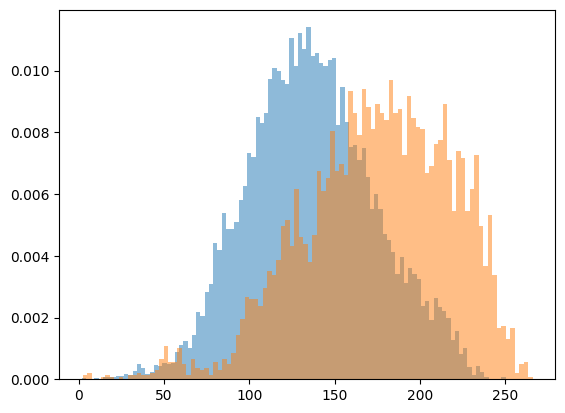

primary_cleaner.input.depressant


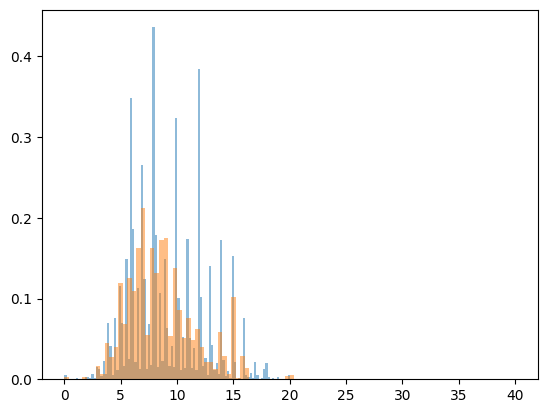

primary_cleaner.input.feed_size


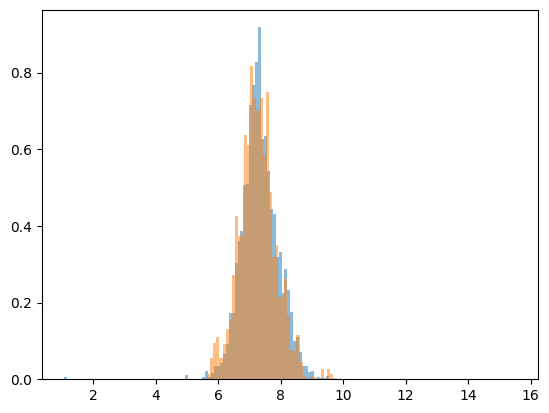

primary_cleaner.input.xanthate


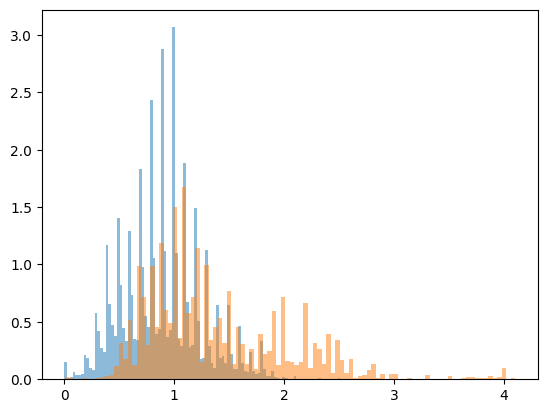

primary_cleaner.state.floatbank8_a_air


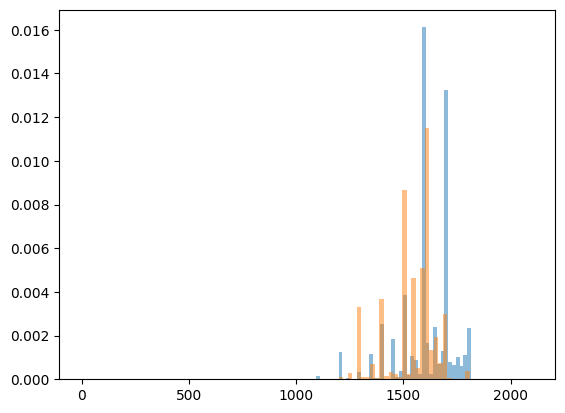

primary_cleaner.state.floatbank8_a_level


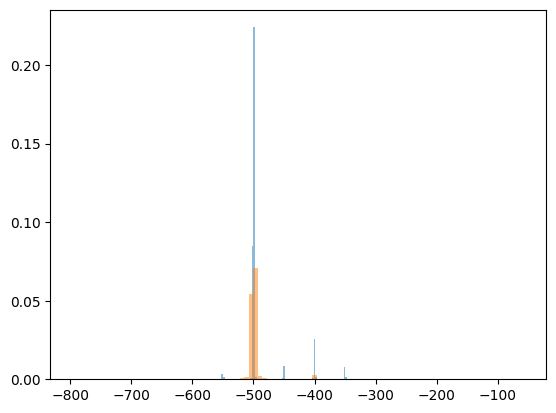

primary_cleaner.state.floatbank8_b_air


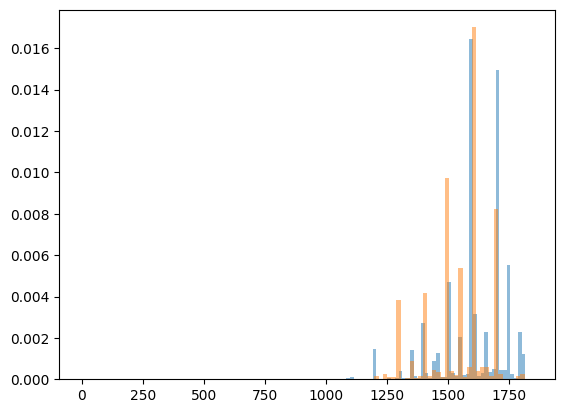

primary_cleaner.state.floatbank8_b_level


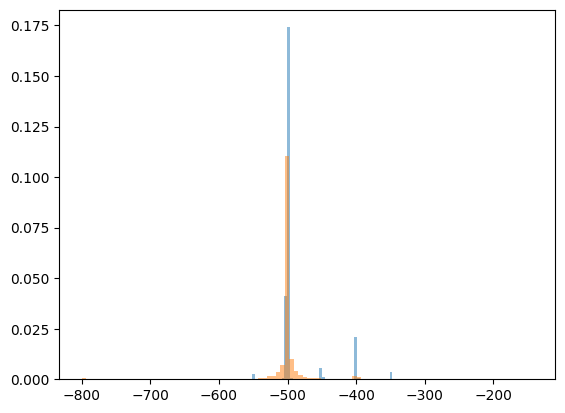

primary_cleaner.state.floatbank8_c_air


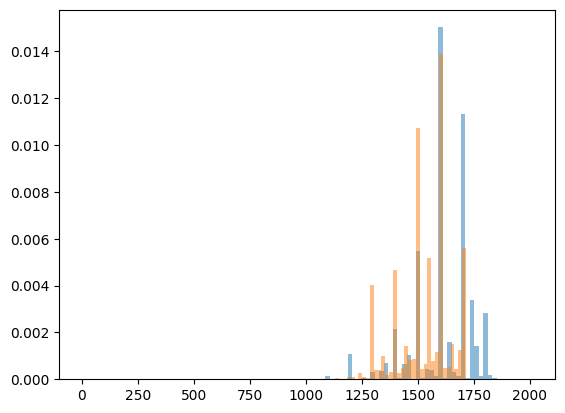

primary_cleaner.state.floatbank8_c_level


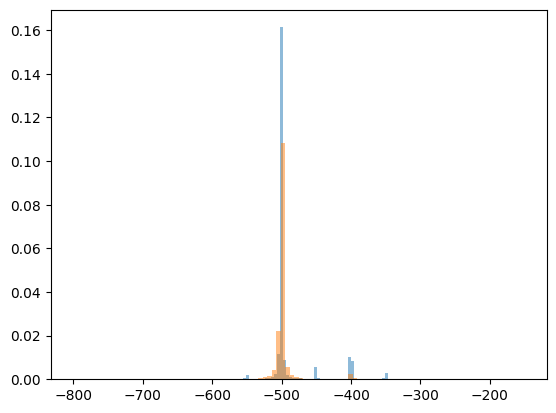

primary_cleaner.state.floatbank8_d_air


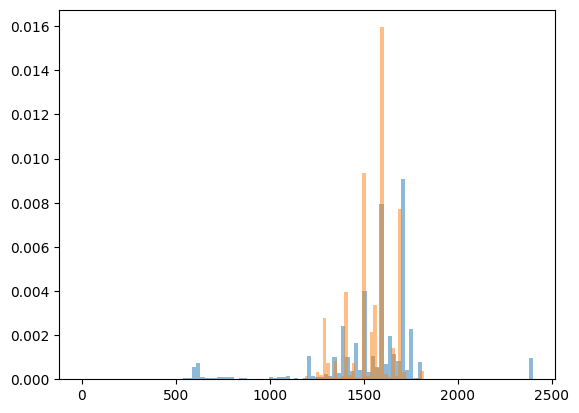

primary_cleaner.state.floatbank8_d_level


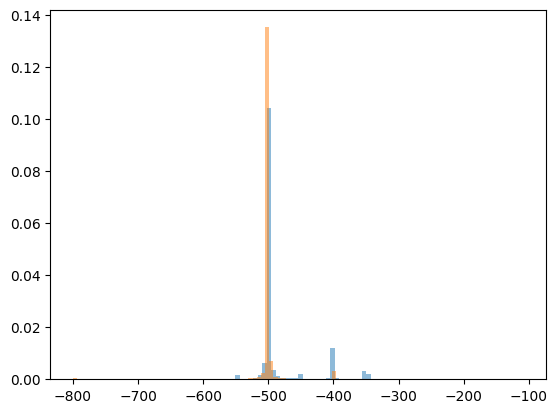

rougher.input.feed_ag


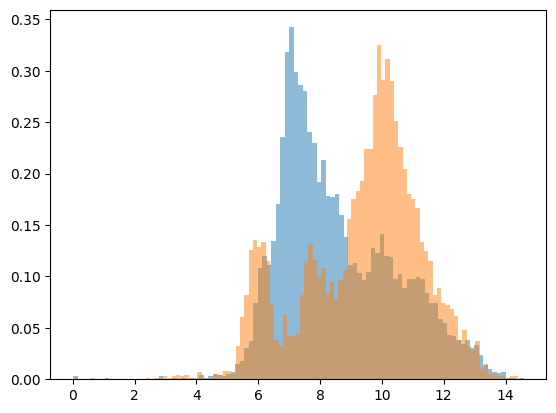

rougher.input.feed_pb


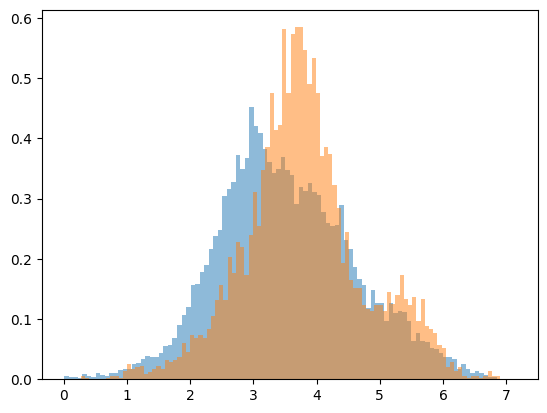

rougher.input.feed_rate


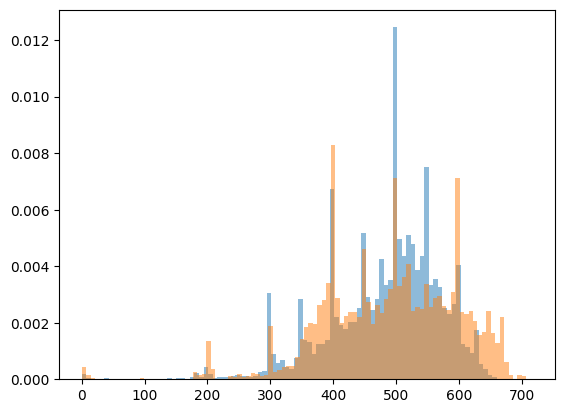

rougher.input.feed_size


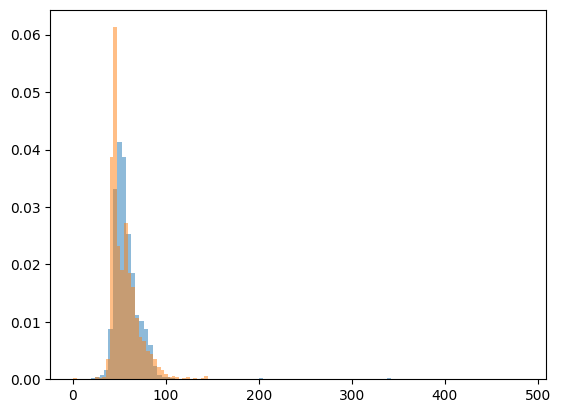

rougher.input.feed_sol


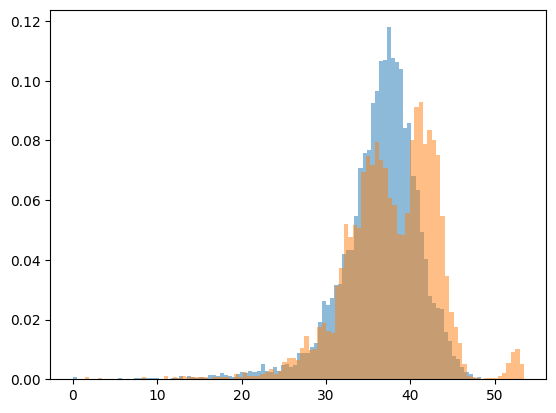

rougher.input.feed_au


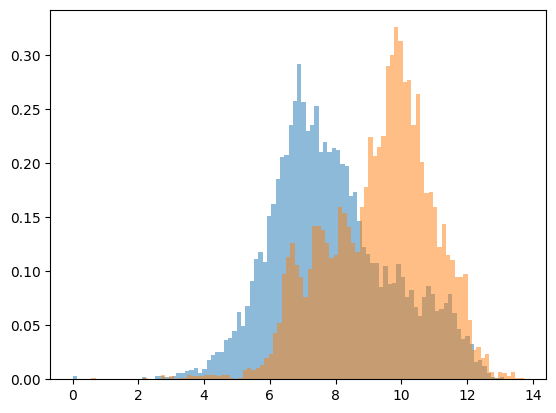

rougher.input.floatbank10_sulfate


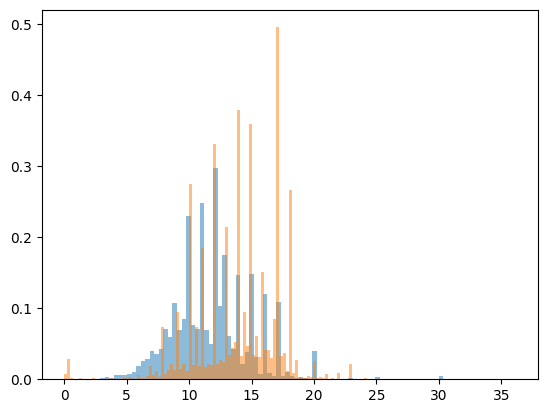

rougher.input.floatbank10_xanthate


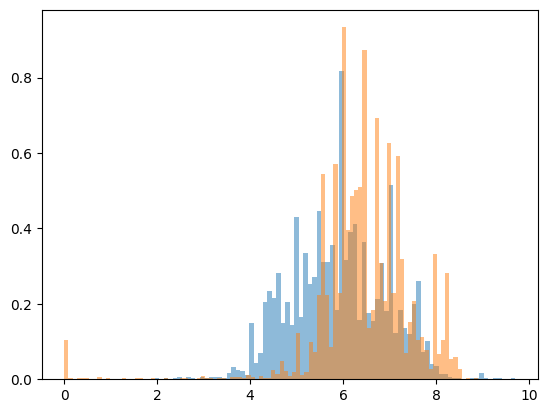

rougher.input.floatbank11_sulfate


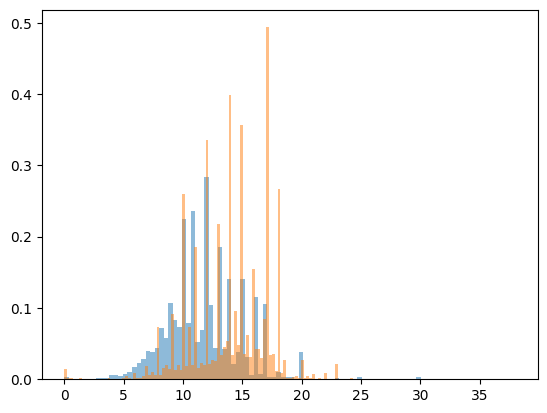

rougher.input.floatbank11_xanthate


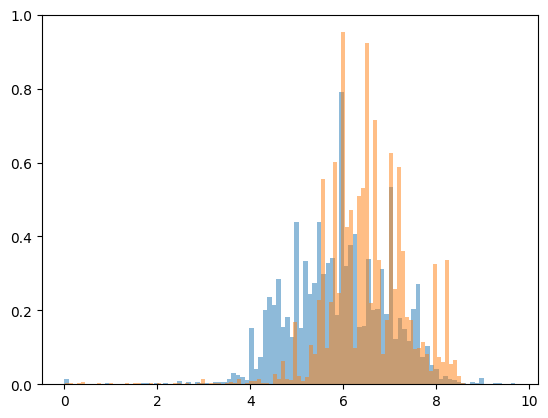

rougher.output.recovery


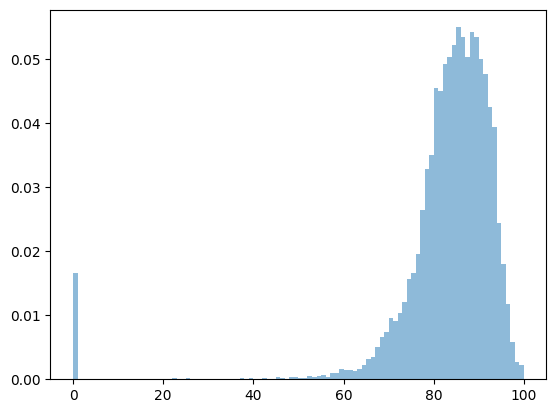

rougher.state.floatbank10_a_air


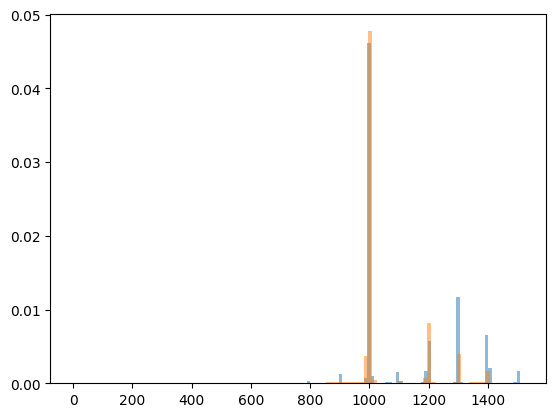

rougher.state.floatbank10_a_level


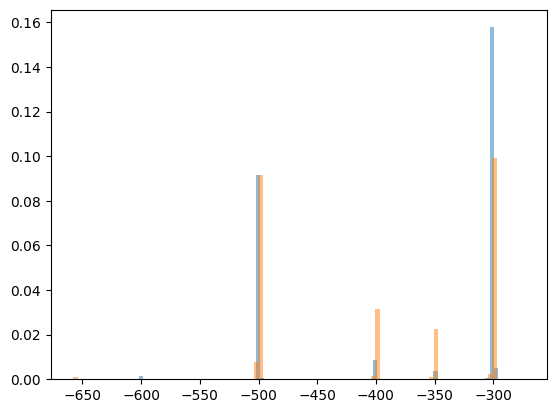

rougher.state.floatbank10_b_air


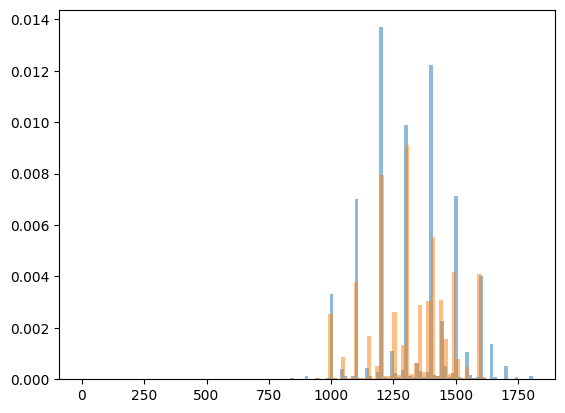

rougher.state.floatbank10_b_level


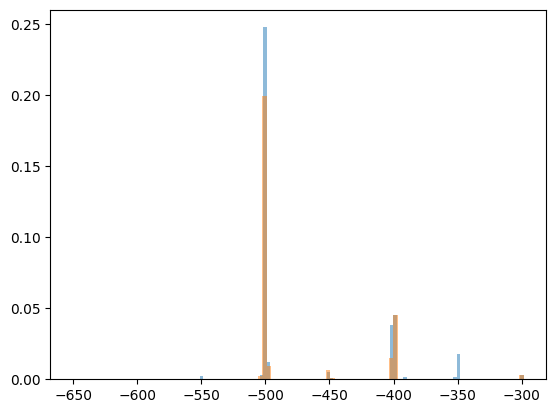

rougher.state.floatbank10_c_air


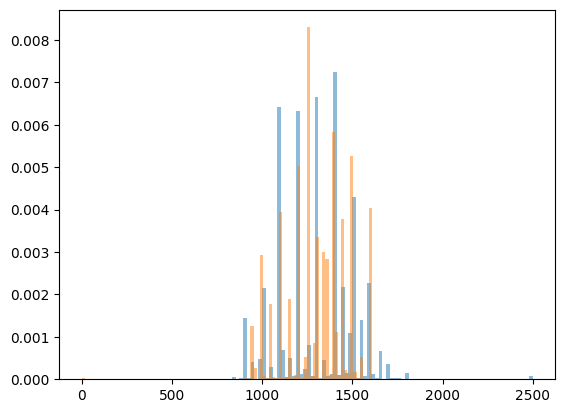

rougher.state.floatbank10_c_level


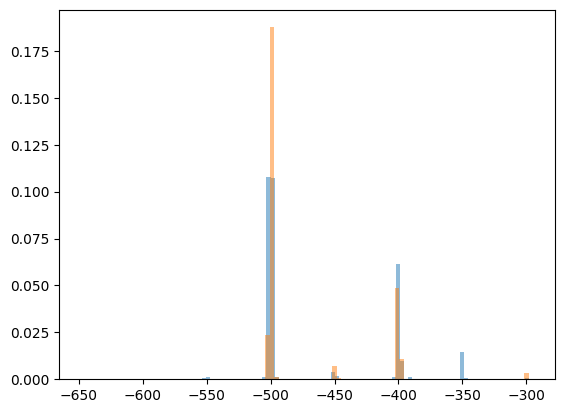

rougher.state.floatbank10_d_air


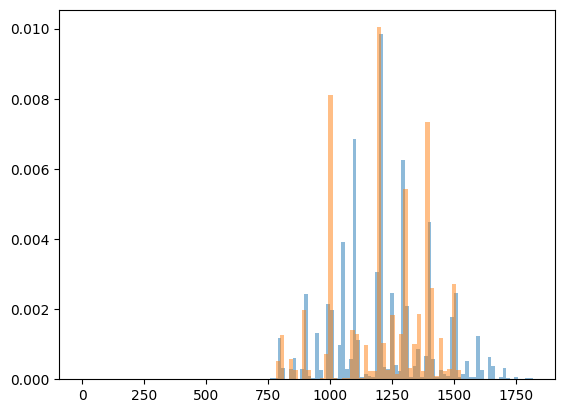

rougher.state.floatbank10_d_level


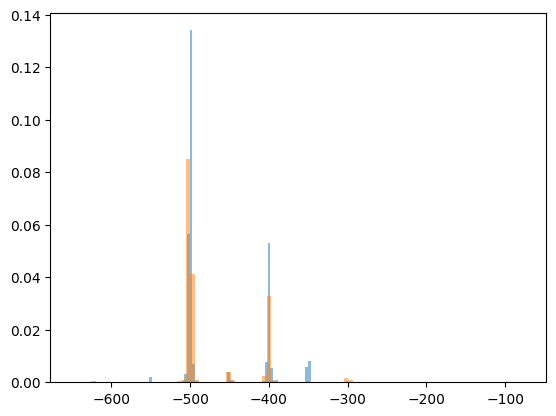

rougher.state.floatbank10_e_air


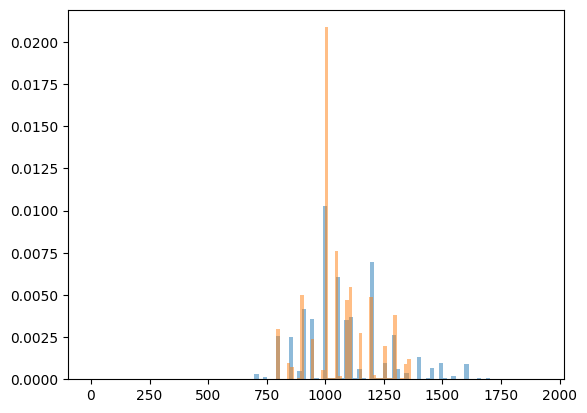

rougher.state.floatbank10_e_level


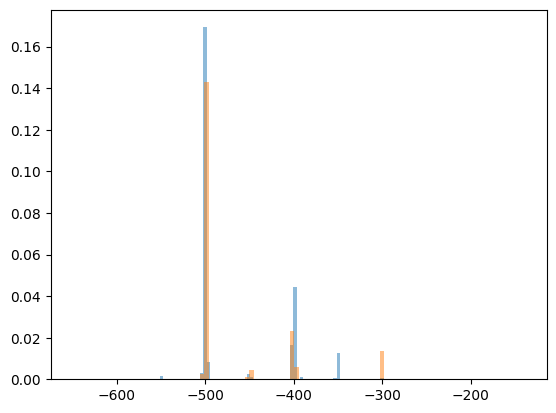

rougher.state.floatbank10_f_air


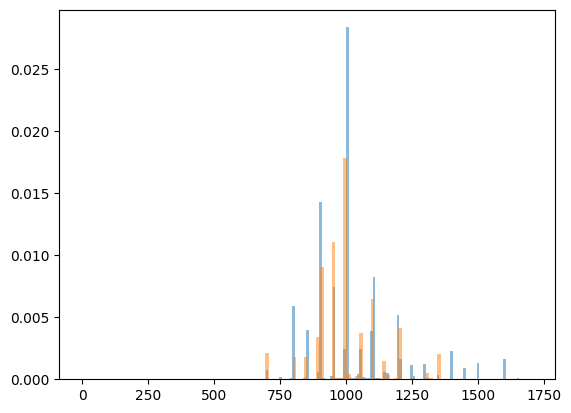

rougher.state.floatbank10_f_level


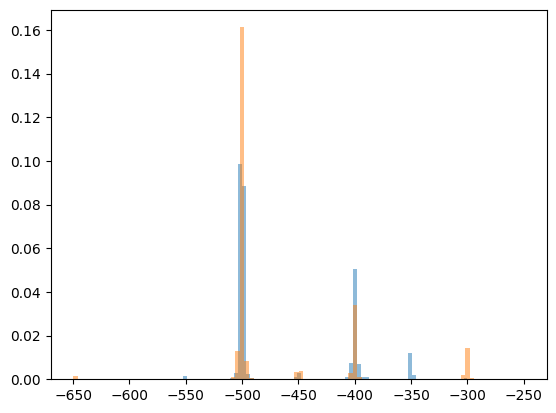

secondary_cleaner.state.floatbank2_a_air


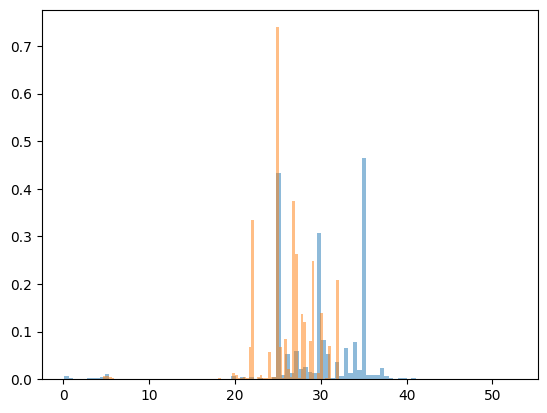

secondary_cleaner.state.floatbank2_a_level


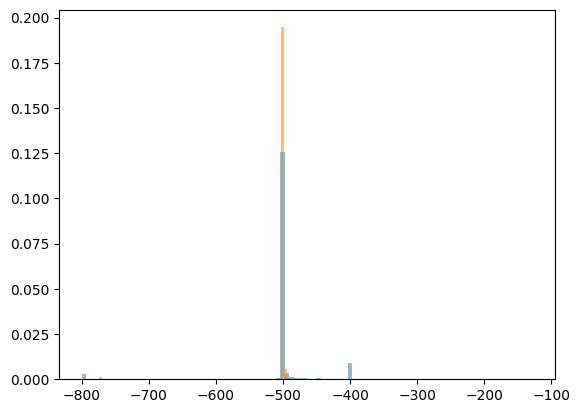

secondary_cleaner.state.floatbank2_b_air


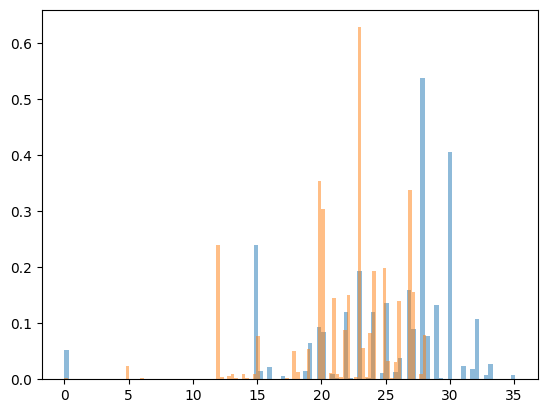

secondary_cleaner.state.floatbank2_b_level


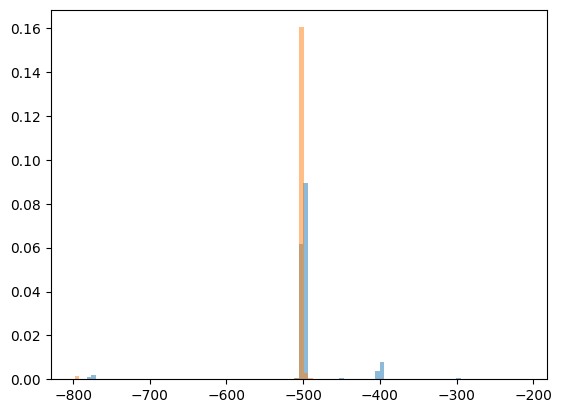

secondary_cleaner.state.floatbank3_a_air


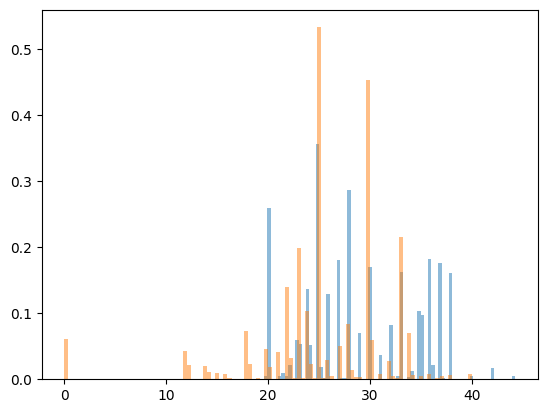

secondary_cleaner.state.floatbank3_a_level


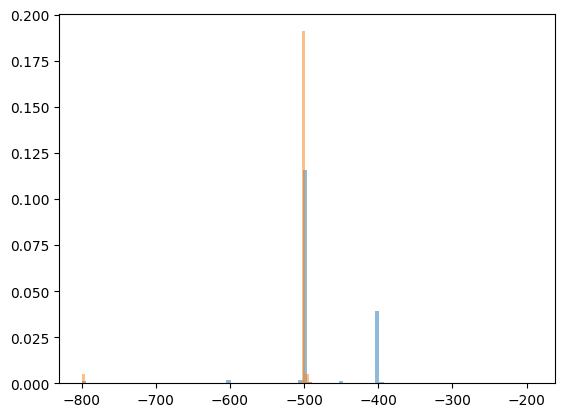

secondary_cleaner.state.floatbank3_b_air


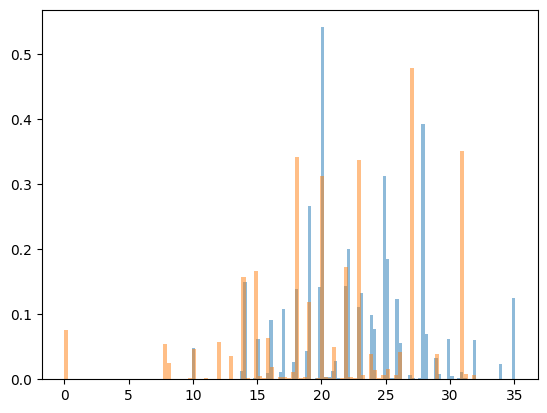

secondary_cleaner.state.floatbank3_b_level


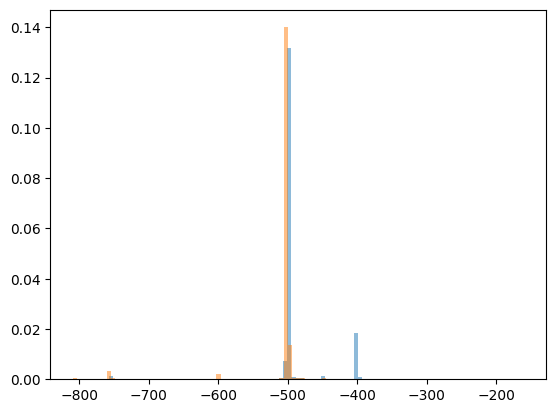

secondary_cleaner.state.floatbank4_a_air


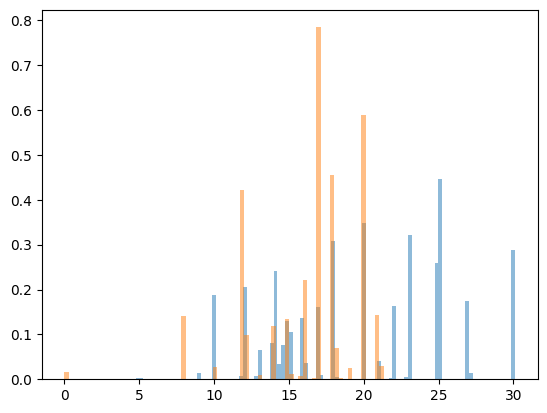

secondary_cleaner.state.floatbank4_a_level


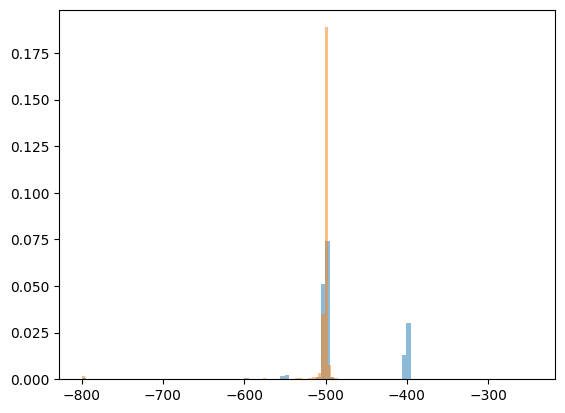

secondary_cleaner.state.floatbank4_b_air


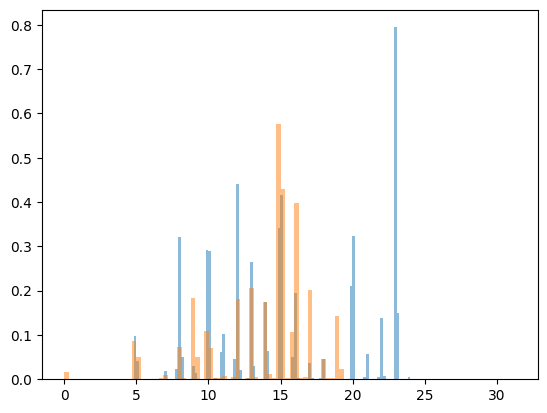

secondary_cleaner.state.floatbank4_b_level


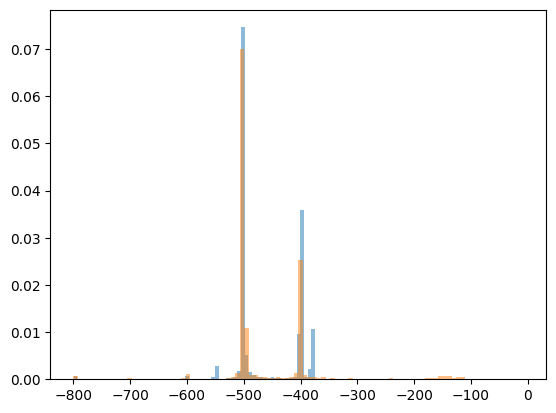

secondary_cleaner.state.floatbank5_a_air


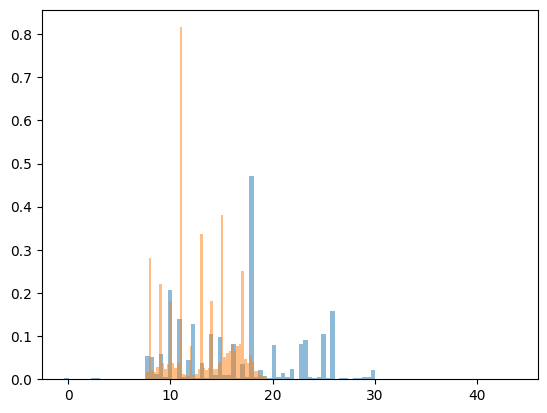

secondary_cleaner.state.floatbank5_a_level


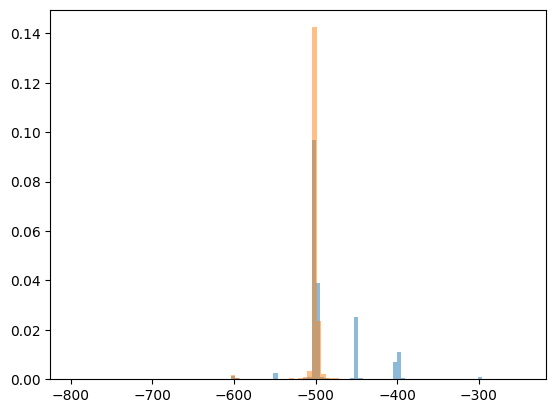

secondary_cleaner.state.floatbank5_b_air


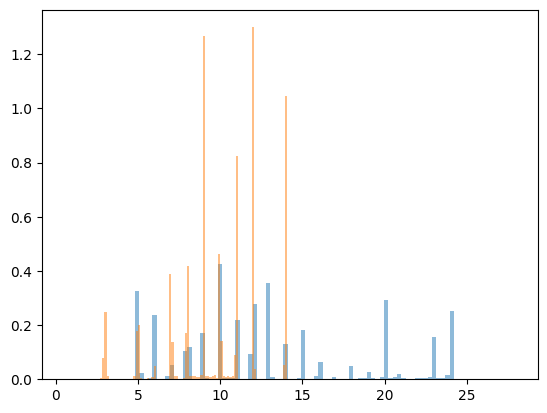

secondary_cleaner.state.floatbank5_b_level


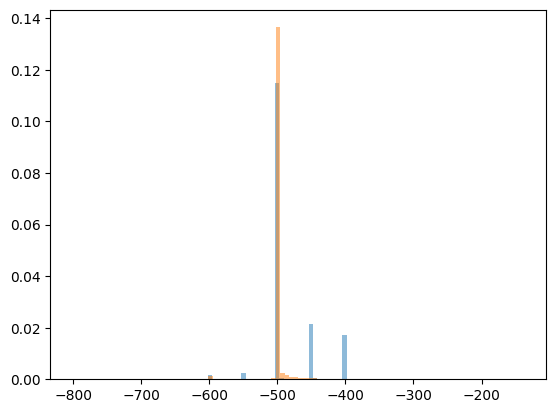

secondary_cleaner.state.floatbank6_a_air


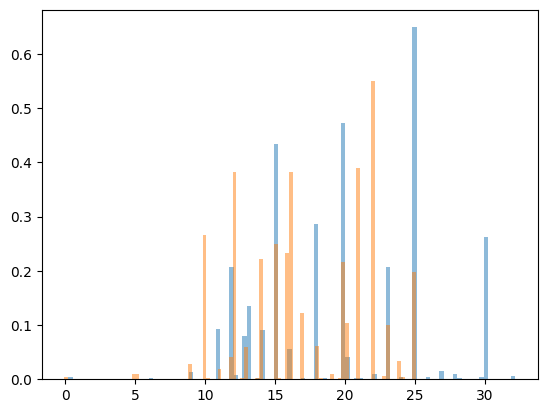

secondary_cleaner.state.floatbank6_a_level


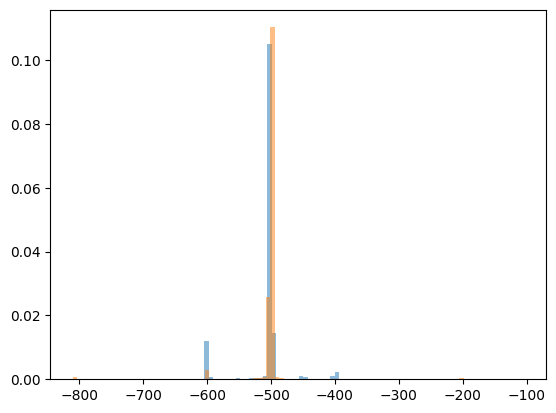

In [68]:
bins = 100
for i in train.columns:
    print(i)
    plt.hist(train[i], bins=bins, alpha=0.5, density=True)
    if i in test.columns:
        plt.hist(test[i], bins=bins, alpha=0.5, density=True)
    plt.show()

Основные выводы и расхождения:  
- для тестовой выборки взяли выбранные даты  
- в тестовой выборке распределения параметров не полностью повторяют распределение в обучающей выборке; как минимум, все данные кроме дат необходимо нормализовать перед обучением модели

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Выборки разного размера - гистограммы необходимо нормализовать.</font>  
<font color='purple'><b>Комментарий студента: добавил `density=True`; в основном стало лучше видно, что в целом данные похожи, но есть и выбросы</b></font>

<a id='step2'></a>
## Шаг 2. Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [69]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [70]:
metals = ['au', 'ag', 'pb']
prefix_states = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
axis_states = ['в исходном сырье', 'после флотации', 'после первичной очистки', 'в финальном концентрате']

AU


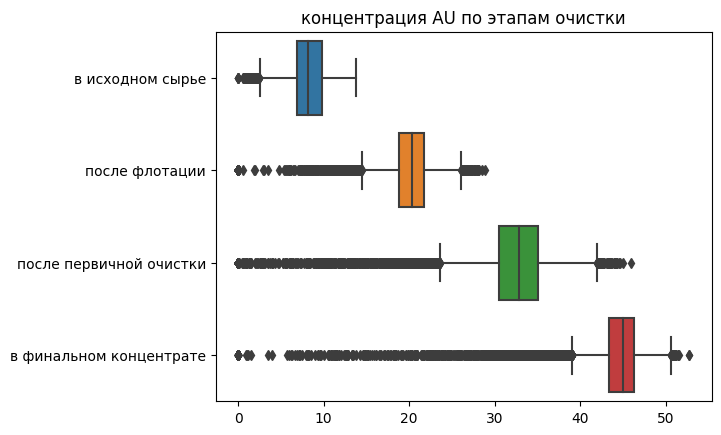

AG


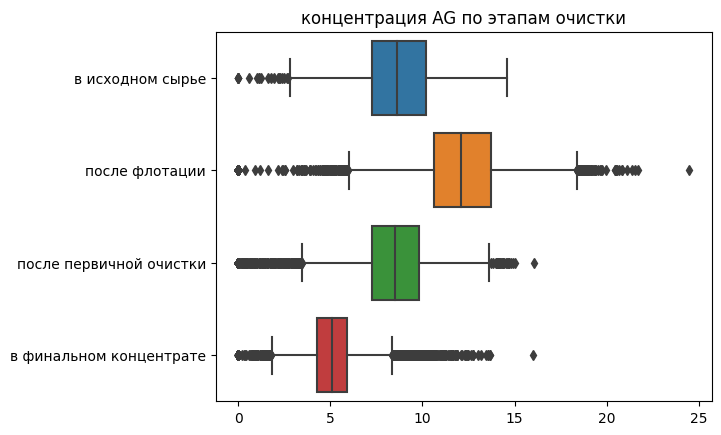

PB


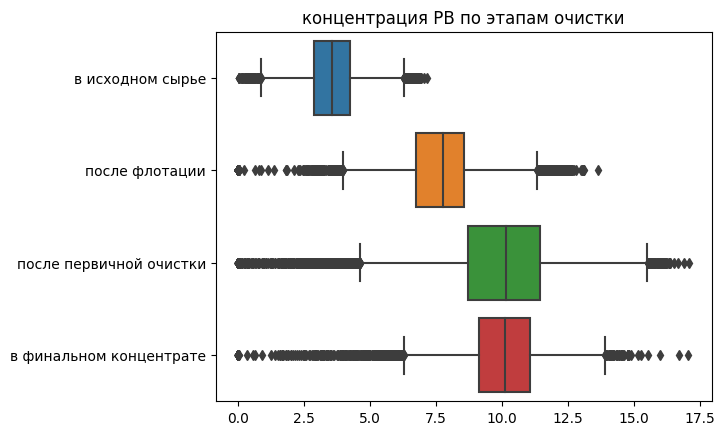

In [71]:
for metal in metals:
    p = []
    for i in range(len(prefix_states)):
        p.append(prefix_states[i] + metal)
    print(metal.upper())
    fig, ax = plt.subplots()
    _ = sns.boxplot(data=full[p], orient='h')
    ax.set_yticklabels(axis_states)
    plt.title(label=f'концентрация {metal.upper()} по этапам очистки')
    plt.show()

Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
Концентрация серебра вырастает после флотации с 9% до 13%, затем падает до 5% после финального этапа очистки  
Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Всё верно!</font>

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [72]:
train['rougher.input.feed_size'].describe()

count    12679.000000
mean        58.414412
std         20.441275
min          9.659576
25%         48.721041
50%         54.651129
75%         63.719220
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [73]:
test['rougher.input.feed_size'].describe()

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot:>

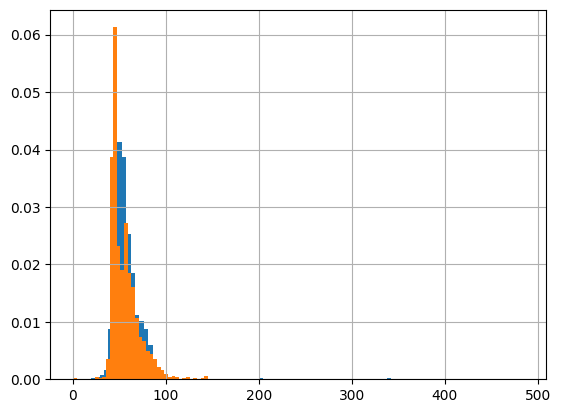

In [74]:
train['rougher.input.feed_size'].hist(bins=100, density=True)
test['rougher.input.feed_size'].hist(bins=100, density=True)

распределение размера гранул не являются одинаковыми на обучающей и тестовой выборках, но нормализации должно быть достаточно для обеспечения качественных предсказаний

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.</font>  
<font color='purple'><b>Комментарий студента: да, добавил `density=True` и стало еще лучше видно</b></font>

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [75]:
rougher_feed = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_au = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
final_au = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

full['rougher_feed'] = full[rougher_feed].sum(axis=1)
full['rougher_au'] = full[rougher_au].sum(axis=1)
full['final_au'] = full[final_au].sum(axis=1)

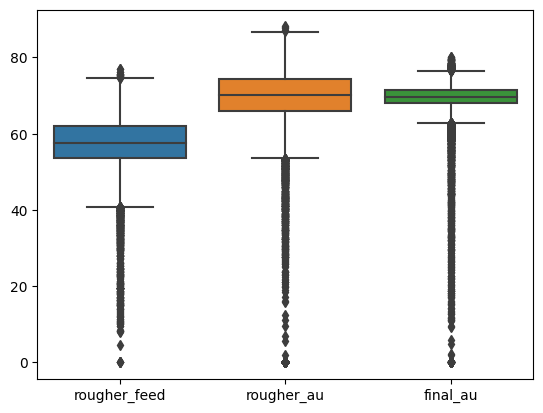

In [76]:
_ = sns.boxplot(data=full[['rougher_feed', 'rougher_au', 'final_au']])

после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Обрати внимание на нулевые и около нулевые значения концентраций. Это явная аномалия. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из **обучающих** данных.\
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.</font>

<a id='step3'></a>
## Шаг 3. Построение модели

In [77]:
test.fillna(method='ffill', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Лучше использовать `ffill`, при работе будут заполнять пердыдущим значением, а не будущим.</font>  
<font color='purple'><b>Комментарий студента: поправлено</b></font>

функции для вычисления итоговой sMAPE

In [78]:
#def sMAPE(y_true, y_pred):
#    y_true = list(y_true)
#    y_pred = list(y_pred)
#    sum_ = 0.0
#    n = len(y_true)
#    for i in range(n):
#        nom = abs(y_true[i] - y_pred[i])
#        den = abs(y_true[i]) + abs(y_pred[i])
#        dt = nom / den
#        sum_ += 2.0 * dt
#    return 100.0 * sum_ / n

def sMAPE(y_true, y_pred):
    return 200.0 * np.mean (np.abs(y_true-y_pred) / (np.abs(y_true) + np.abs(y_pred)))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `sMAPE` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Цикл сильно тормозит вычисления. Для суммы в Pyhton есть отличные методы!</font>  
<font color='purple'><b>Комментарий студента: переписал функцию, стары код закомментировал</b></font>

In [79]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [80]:
def sMAPEtotal_(sMAPErougher, sMAPEfinal):
    return 0.25 * sMAPErougher + 0.75 * sMAPEfinal

def sMAPEtotal(rougher_true, rougher_pred, final_true, final_pred):
    return sMAPEtotal_(sMAPE(rougher_true, rougher_pred), sMAPE(final_true, final_pred))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [81]:
features = train.drop(columns=target_date_columns)
target = train[target_columns]

In [82]:
features_test = pd.merge(test, full[target_date_columns], on='date')
target_test = features_test[target_columns]
features_test.drop(columns=target_date_columns, inplace=True)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно, при пересечении таблиц лучше привязаться ко времени.</font>

In [83]:
model = Pipeline([
    ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Круто! Pipeline позволяет избежать утечек информации через предобработку даже при кроссвалидации.</font>

In [84]:
param_grid = {
}
search0 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[0]])
lr_rougher = search0.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [85]:
search1 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, verbose=10).fit(features, target[target_columns[1]])
lr_final = search1.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [86]:
print(search0.best_score_, search1.best_score_)

-81.43135215987427 -84.90925459708969


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Полиномы здесь плохо работают, поробуй без них.</font>  
<font color='purple'><b>Комментарий студента: исправлено</b></font>

In [87]:
model = Pipeline([
        ('scaler', StandardScaler()),
#            ('poly', PolynomialFeatures(degree=2)),
                ('svr', SVR())
                ])

In [88]:
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__gamma': [1.0, 0.1, 0.01],
    'svr__C': [1, 10, 100]
}
search0 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[0]])
svr_rougher = search0.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
search1 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, verbose=10).fit(features, target[target_columns[1]])
svr_final = search1.best_estimator_

In [ ]:
print(search0.best_score_, search1.best_score_)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [ ]:
model = Pipeline([
#        ('scaler', StandardScaler()),
#            ('poly', PolynomialFeatures(degree=2)),
                ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
                ])

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Деревьям и Полиномы и Стандартизация только усложняют вычисления.</font>  
<font color='purple'><b>Комментарий студента: убрано</b></font>

In [ ]:
param_grid = {
    'forest__n_estimators': [10, 50, 100, 150],
    'forest__max_depth': [10, 15, 20]
}
search0 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[0]])
forest_rougher = search0.best_estimator_

In [ ]:
search1 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, verbose=10).fit(features, target[target_columns[1]])
forest_final = search1.best_estimator_

In [ ]:
print(search0.best_score_, search1.best_score_)

результаты моделирования на обучающей выборке (кросс-валидация):  
|модель|rougher|final|
|-|-|-|
|LinearRegression|-81.43|-84.91|
|SVR|-10.80|-10.52|
|RandomForestRegressor|-20.52|-13.09|  

проверим на тестовой выборке модель SVR

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [ ]:
rougher_pred = svr_rougher.predict(features_test)
final_pred = svr_final.predict(features_test)

In [ ]:
sMAPEtotal(target_test['rougher.output.recovery'], rougher_pred, target_test['final.output.recovery'], final_pred)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

итоговая метрика на тестовой выборке составила 9.45%

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</font>

<a id='step4'></a>
## Шаг 4. Результаты и выводы

Были проанализированы данные по очистке золотосодержащей руды.  
Произведена проверка расчета концентрации золоты в исходных данных - успешно.  
Проанализирована предоставленная тестовая выборка. В ней отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть). Также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`  

Проведен анализ концентрации металлов по этапам очистки:
- Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
- Концентрация серебра вырастает после флотации с 9% до 13%, затем падает до 5% после финального этапа очистки  
- Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате  

Проведен анализ суммарной концентрации всех веществ на разных стадиях:  
- после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
- после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр  
  
Построены 3 модели отдельно для 2 целевых величин:
- `rougher.output.recovery`
- `final.output.recovery`  
Результаты метрик sMAPE на обучающей выборке (кросс-валидация):  

|модель|rougher.output.recovery|final.output.recovery|
|-|-|-|
|LinearRegression|-81.43|-84.91|
|SVR|-10.80|-10.52|
|RandomForestRegressor|-20.52|-13.09|  

Для проверки на тестовой выборке выбрана модель SVR, показала итоговую метрику sMAPEtotal = 9.45%

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Николай, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй обучить модели на очищенных от выбросов данных.</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>